Import libraries

In [59]:
import requests
from bs4 import BeautifulSoup   
import pandas as pd

Web scrapping


In [ ]:
link="https://www.cardekho.com/fuel-price"
header={"User-Agent":"Mozilla/5.0"}
response=requests.get(link,headers=header)
soup=BeautifulSoup(response.text,"lxml")

## Find table --> tbody --> tr -->td texts
table=soup.find_all("table")
expect_table=table[3]
# print(len(table))
# for i,j in enumerate(table):
#     print(i,j)
   
tbody=expect_table.find("tbody")
table_row=tbody.find_all("tr")
petrol=[]

for rows in table_row:
    table_data=rows.find_all("td")
    data=[i.text.strip() for i in table_data]
    petrol.append(data)
## Create dataframe    
df=pd.DataFrame(petrol[2:],columns=["State","Petrol_Price(Cost/L)"])    
df.to_csv("petrol_data.csv")

In [27]:
import pandas as pd

Read the csv file

In [253]:
dataset=pd.read_csv("petrol_data.csv",index_col=0)
print(dataset.head())

               State Petrol_Price(Cost/L)
0     Andhra Pradesh              ₹109.76
1  Arunachal Pradesh               ₹92.66
2              Assam                  ₹99
3              Bihar              ₹106.94
4         Chandigarh                ₹94.3


Data types

In [254]:
dataset.dtypes

State                   object
Petrol_Price(Cost/L)    object
dtype: object

Dataset Information

In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 31 non-null     object
 1   Petrol_Price(Cost/L)  31 non-null     object
dtypes: object(2)
memory usage: 744.0+ bytes


Check null values

In [256]:
dataset.isnull().sum()

State                   0
Petrol_Price(Cost/L)    0
dtype: int64

small stats

In [257]:
dataset.describe()

,State,Petrol_Price(Cost/L)
count,31,31
unique,31,31
top,Andhra Pradesh,₹109.76
freq,1,1


Column names

In [258]:
dataset.columns

Index(['State', 'Petrol_Price(Cost/L)'], dtype='object')

Remove "₹" symbol

In [259]:
dataset["Petrol_Price(Cost/L)"]=dataset["Petrol_Price(Cost/L)"].replace(r"[^\d.]","",regex=True).astype("float")
print(dataset.head())

               State  Petrol_Price(Cost/L)
0     Andhra Pradesh                109.76
1  Arunachal Pradesh                 92.66
2              Assam                 99.00
3              Bihar                106.94
4         Chandigarh                 94.30


Sort value by price

In [260]:
sort=dataset.sort_values("Petrol_Price(Cost/L)",ascending=False)
print(sort.head())

             State  Petrol_Price(Cost/L)
0   Andhra Pradesh                109.76
26       Telangana                108.83
14  Madhya Pradesh                107.83
3            Bihar                106.94
30     West Bengal                106.68


sorted value description

In [261]:
sort.describe()

,Petrol_Price(Cost/L)
count,31.000000
mean,99.479677
std,5.304463
min,92.370000
25%,94.940000
50%,98.450000
75%,103.750000
max,109.760000


Pivot table

In [262]:
pivot=dataset.pivot_table(index="State",values=sort)
pivot

,Petrol_Price(Cost/L)
State,
Andhra Pradesh,109.76
Arunachal Pradesh,92.66
Assam,99.00
Bihar,106.94
Chandigarh,94.30
Dadra and Nagar Haveli,92.57
Daman and Diu,92.37
Delhi,94.77
Gujarat,94.29


Manimum price and Maximum price

In [301]:
high=sort.iloc[0]
low=sort.iloc[-1]
print(low)
print(high)

State                   Daman and Diu
Petrol_Price(Cost/L)            92.37
Name: 6, dtype: object
State                   Andhra Pradesh
Petrol_Price(Cost/L)            109.76
Name: 0, dtype: object


In [264]:

import matplotlib.pyplot as plt

State wise Petrol Price

<BarContainer object of 31 artists>

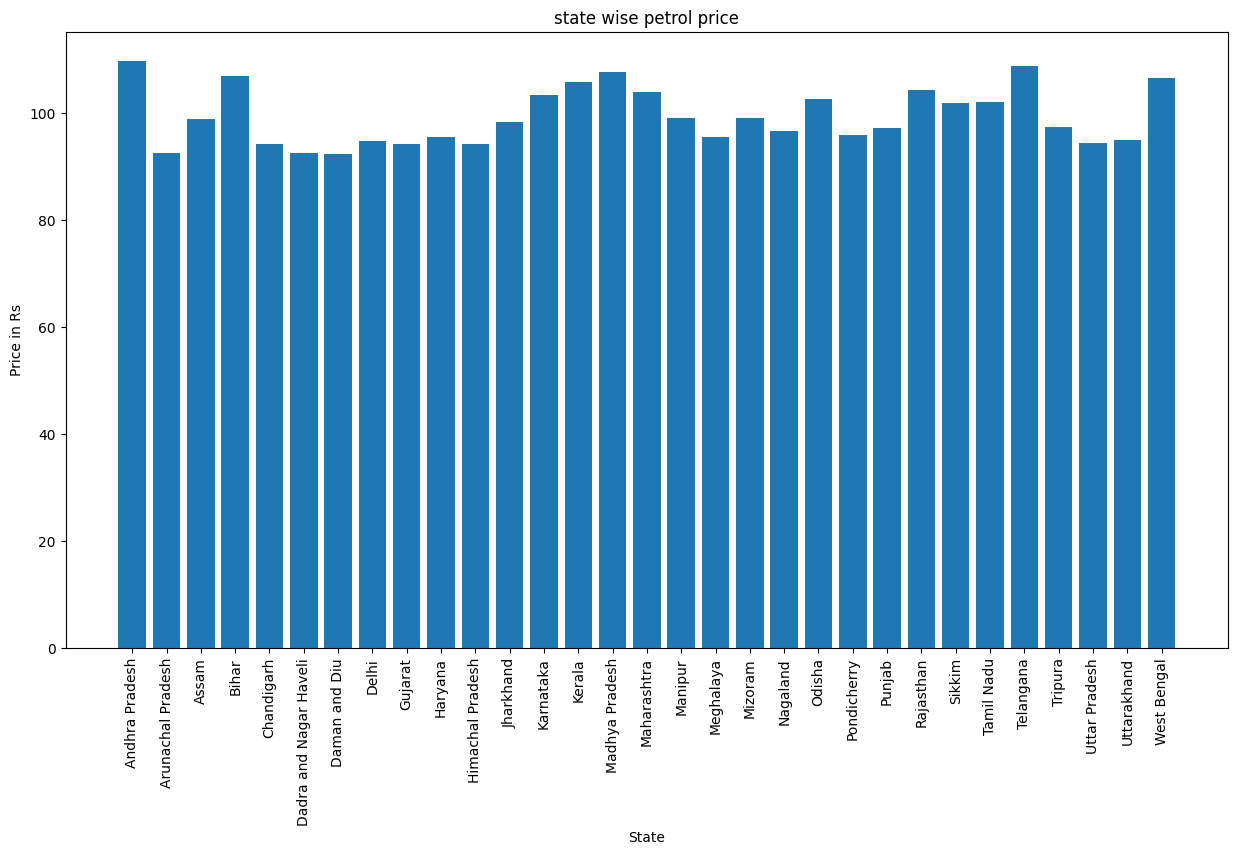

In [305]:
x=dataset["State"]
y=dataset["Petrol_Price(Cost/L)"]
plt.figure(figsize=(15,8))
plt.title("state wise petrol price")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Price in Rs")
plt.bar(x,y)

South India Petrol Price

In [ ]:
near_tamilnadu=["Tamil Nadu","Kerala","Karnataka","Andhra Pradesh"]
match=dataset[dataset["State"].isin(near_tamilnadu)]
match.sort_values("Petrol_Price(Cost/L)").agg()


,State,Petrol_Price(Cost/L)
25,Tamil Nadu,102.08
12,Karnataka,103.39
13,Kerala,105.87
0,Andhra Pradesh,109.76


Average ,Max,Min Price in South India

In [302]:
match.describe()

,Petrol_Price(Cost/L)
count,4.000000
mean,105.275000
std,3.377894
min,102.080000
25%,103.062500
50%,104.630000
75%,106.842500
max,109.760000


10-High Petrol Price states

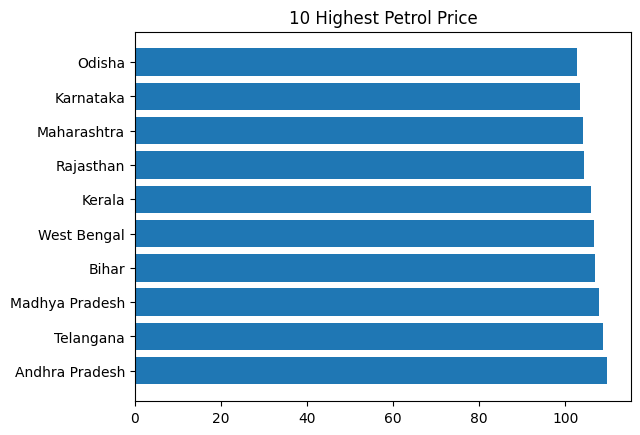

             State  Petrol_Price(Cost/L)
0   Andhra Pradesh                109.76
26       Telangana                108.83
14  Madhya Pradesh                107.83
3            Bihar                106.94
30     West Bengal                106.68
13          Kerala                105.87
23       Rajasthan                104.36
15     Maharashtra                104.11
12       Karnataka                103.39
20          Odisha                102.63


In [322]:
a=sort.iloc[:,0]
b=sort.iloc[:,1]
plt.barh(a.head(10),b.head(10))
plt.title("10 Highest Petrol Price")
plt.show()
print(sort.head(10))

Low Petrol Price states

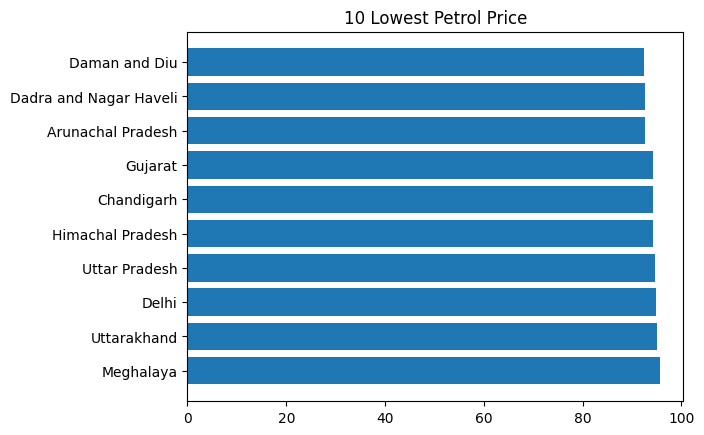

                     State  Petrol_Price(Cost/L)
17               Meghalaya                 95.62
29             Uttarakhand                 95.11
7                    Delhi                 94.77
28           Uttar Pradesh                 94.55
10        Himachal Pradesh                 94.33
4               Chandigarh                 94.30
8                  Gujarat                 94.29
1        Arunachal Pradesh                 92.66
5   Dadra and Nagar Haveli                 92.57
6            Daman and Diu                 92.37


In [323]:
plt.barh(a.tail(10),b.tail(10))
plt.title("10 Lowest Petrol Price")
plt.show()
print(sort.tail(10))
